# Sentiment Analysis

## 1. Read in Data and NLTK Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv('final_dataset.csv')

In [3]:
df.head()

,date,Candidate_name,Comment,Election_year,Postal_data,Poll_data,Final_percentage
0,12/31/2014,Mahinda,Happy new year to you my king !!! All the best...,2015,45.04,45.46,47.58
1,12/31/2014,Mahinda,go sri lanka go...,2015,45.04,45.46,47.58
2,12/31/2014,Mahinda,Good luck .,2015,45.04,45.46,47.58
3,12/31/2014,Mahinda,win,2015,45.04,45.46,47.58
4,12/31/2014,Mahinda,"Good luck, president",2015,45.04,45.46,47.58


In [4]:
df.shape

(1832, 7)

### Basic EDA

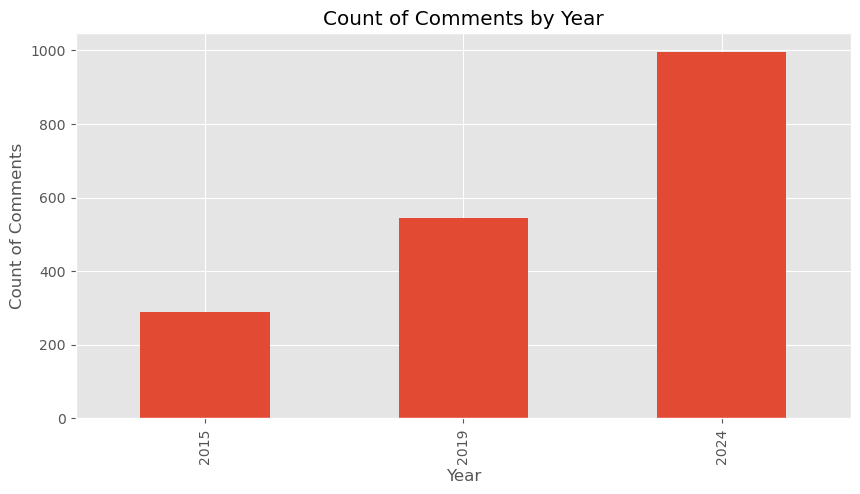

In [5]:
ax = df['Election_year'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Comments by Year',
          figsize=(10,5))

ax.set_xlabel('Year')
ax.set_ylabel('Count of Comments')

plt.show()

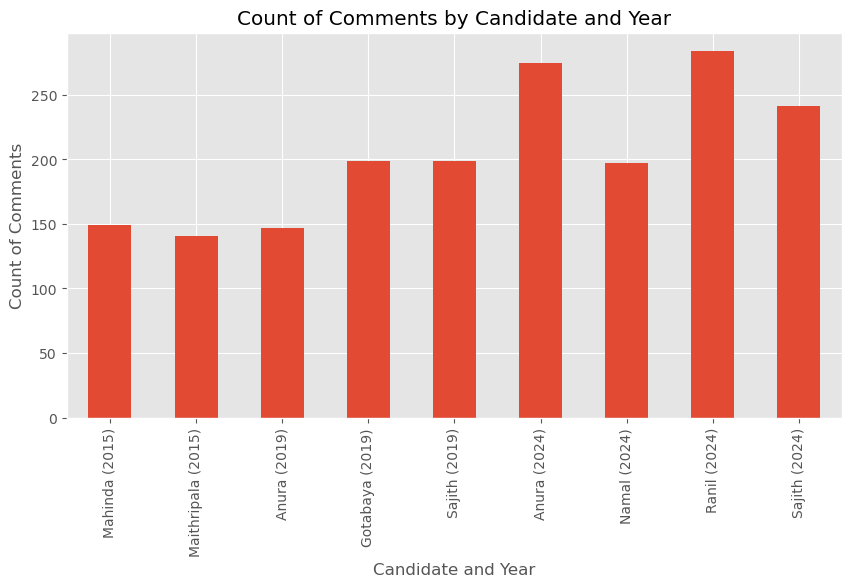

In [6]:
# Combine 'Candidate_name' and 'Election_year' into a single column
df['Candidate_Year'] = df['Candidate_name'] + ' (' + df['Election_year'].astype(str) + ')'

# Group by 'Candidate_name' and 'Election_year' to get counts
df_grouped = df.groupby(['Candidate_name', 'Election_year']).size().reset_index(name='Counts')

# Create 'Candidate_Year' again after grouping to use it for plotting
df_grouped['Candidate_Year'] = df_grouped['Candidate_name'] + ' (' + df_grouped['Election_year'].astype(str) + ')'

# Sort by 'Election_year' for proper order
df_sorted = df_grouped.sort_values(by='Election_year')

# Plot
ax = df_sorted.plot(kind='bar',
                    x='Candidate_Year', 
                    y='Counts',
                    title='Count of Comments by Candidate and Year',
                    figsize=(10, 5),
                    legend=False)

ax.set_xlabel('Candidate and Year')
ax.set_ylabel('Count of Comments')

plt.show()


### Basic NLTK

In [7]:
example = df['Comment'][450]
print(example)

Excellent. We are always with you. We are requesting you to bring back this country where we can stand in front of the world with respect. All the best.


In [8]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:15]

[nltk_data] Downloading package punkt to C:\Users\Sandaru
[nltk_data]     Fernando\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Excellent',
 '.',
 'We',
 'are',
 'always',
 'with',
 'you',
 '.',
 'We',
 'are',
 'requesting',
 'you',
 'to',
 'bring',
 'back']

In [9]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:15]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sandaru Fernando\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Excellent', 'JJ'),
 ('.', '.'),
 ('We', 'PRP'),
 ('are', 'VBP'),
 ('always', 'RB'),
 ('with', 'IN'),
 ('you', 'PRP'),
 ('.', '.'),
 ('We', 'PRP'),
 ('are', 'VBP'),
 ('requesting', 'VBG'),
 ('you', 'PRP'),
 ('to', 'TO'),
 ('bring', 'VB'),
 ('back', 'RP')]

In [10]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Sandaru
[nltk_data]     Fernando\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Sandaru
[nltk_data]     Fernando\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  Excellent/JJ
  ./.
  We/PRP
  are/VBP
  always/RB
  with/IN
  you/PRP
  ./.
  We/PRP
  are/VBP
  requesting/VBG
  you/PRP
  to/TO
  bring/VB
  back/RP
  this/DT
  country/NN
  where/WRB
  we/PRP
  can/MD
  stand/VB
  in/IN
  front/NN
  of/IN
  the/DT
  world/NN
  with/IN
  respect/NN
  ./.
  All/PDT
  the/DT
  best/JJS
  ./.)


## 2. VADER Sentiment Scoring

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Sandaru
[nltk_data]     Fernando\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [13]:
print(example)
sia.polarity_scores(example)

Excellent. We are always with you. We are requesting you to bring back this country where we can stand in front of the world with respect. All the best.


{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.9001}

In [14]:
# Add a new 'Id' column with unique identifiers
df['Id'] = range(1, len(df)+1)

# Reorder the columns to make 'Id' the first column
df = df[['Id'] + [col for col in df.columns if col != 'Id']]

# Verify the changes
print(df.head())

   Id        date Candidate_name  \
0   1  12/31/2014        Mahinda   
1   2  12/31/2014        Mahinda   
2   3  12/31/2014        Mahinda   
3   4  12/31/2014        Mahinda   
4   5  12/31/2014        Mahinda   

                                             Comment  Election_year  \
0  Happy new year to you my king !!! All the best...           2015   
1                                 go sri lanka go...           2015   
2                                        Good luck .           2015   
3                                                win           2015   
4                               Good luck, president           2015   

   Postal_data  Poll_data  Final_percentage  Candidate_Year  
0        45.04      45.46             47.58  Mahinda (2015)  
1        45.04      45.46             47.58  Mahinda (2015)  
2        45.04      45.46             47.58  Mahinda (2015)  
3        45.04      45.46             47.58  Mahinda (2015)  
4        45.04      45.46             47.58  M

In [15]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    comment = row['Comment']
    id = row['Id']
    res[id] = sia.polarity_scores(comment)


  0%|          | 0/1832 [00:00<?, ?it/s]

In [16]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.524,0.476,0.8770
2,0.000,1.000,0.000,0.0000
3,0.000,0.000,1.000,0.7096
4,0.000,0.000,1.000,0.5859
5,0.000,0.145,0.855,0.7096
...,...,...,...,...
1828,0.151,0.849,0.000,-0.4767
1829,0.000,0.841,0.159,0.5267
1830,0.320,0.680,0.000,-0.9545
1831,0.171,0.713,0.116,-0.3034


In [17]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [18]:
# sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,date,Candidate_name,Comment,Election_year,Postal_data,Poll_data,Final_percentage,Candidate_Year
0,1,0.0,0.524,0.476,0.8770,12/31/2014,Mahinda,Happy new year to you my king !!! All the best...,2015,45.04,45.46,47.58,Mahinda (2015)
1,2,0.0,1.000,0.000,0.0000,12/31/2014,Mahinda,go sri lanka go...,2015,45.04,45.46,47.58,Mahinda (2015)
2,3,0.0,0.000,1.000,0.7096,12/31/2014,Mahinda,Good luck .,2015,45.04,45.46,47.58,Mahinda (2015)
3,4,0.0,0.000,1.000,0.5859,12/31/2014,Mahinda,win,2015,45.04,45.46,47.58,Mahinda (2015)
4,5,0.0,0.145,0.855,0.7096,12/31/2014,Mahinda,"Good luck, president",2015,45.04,45.46,47.58,Mahinda (2015)


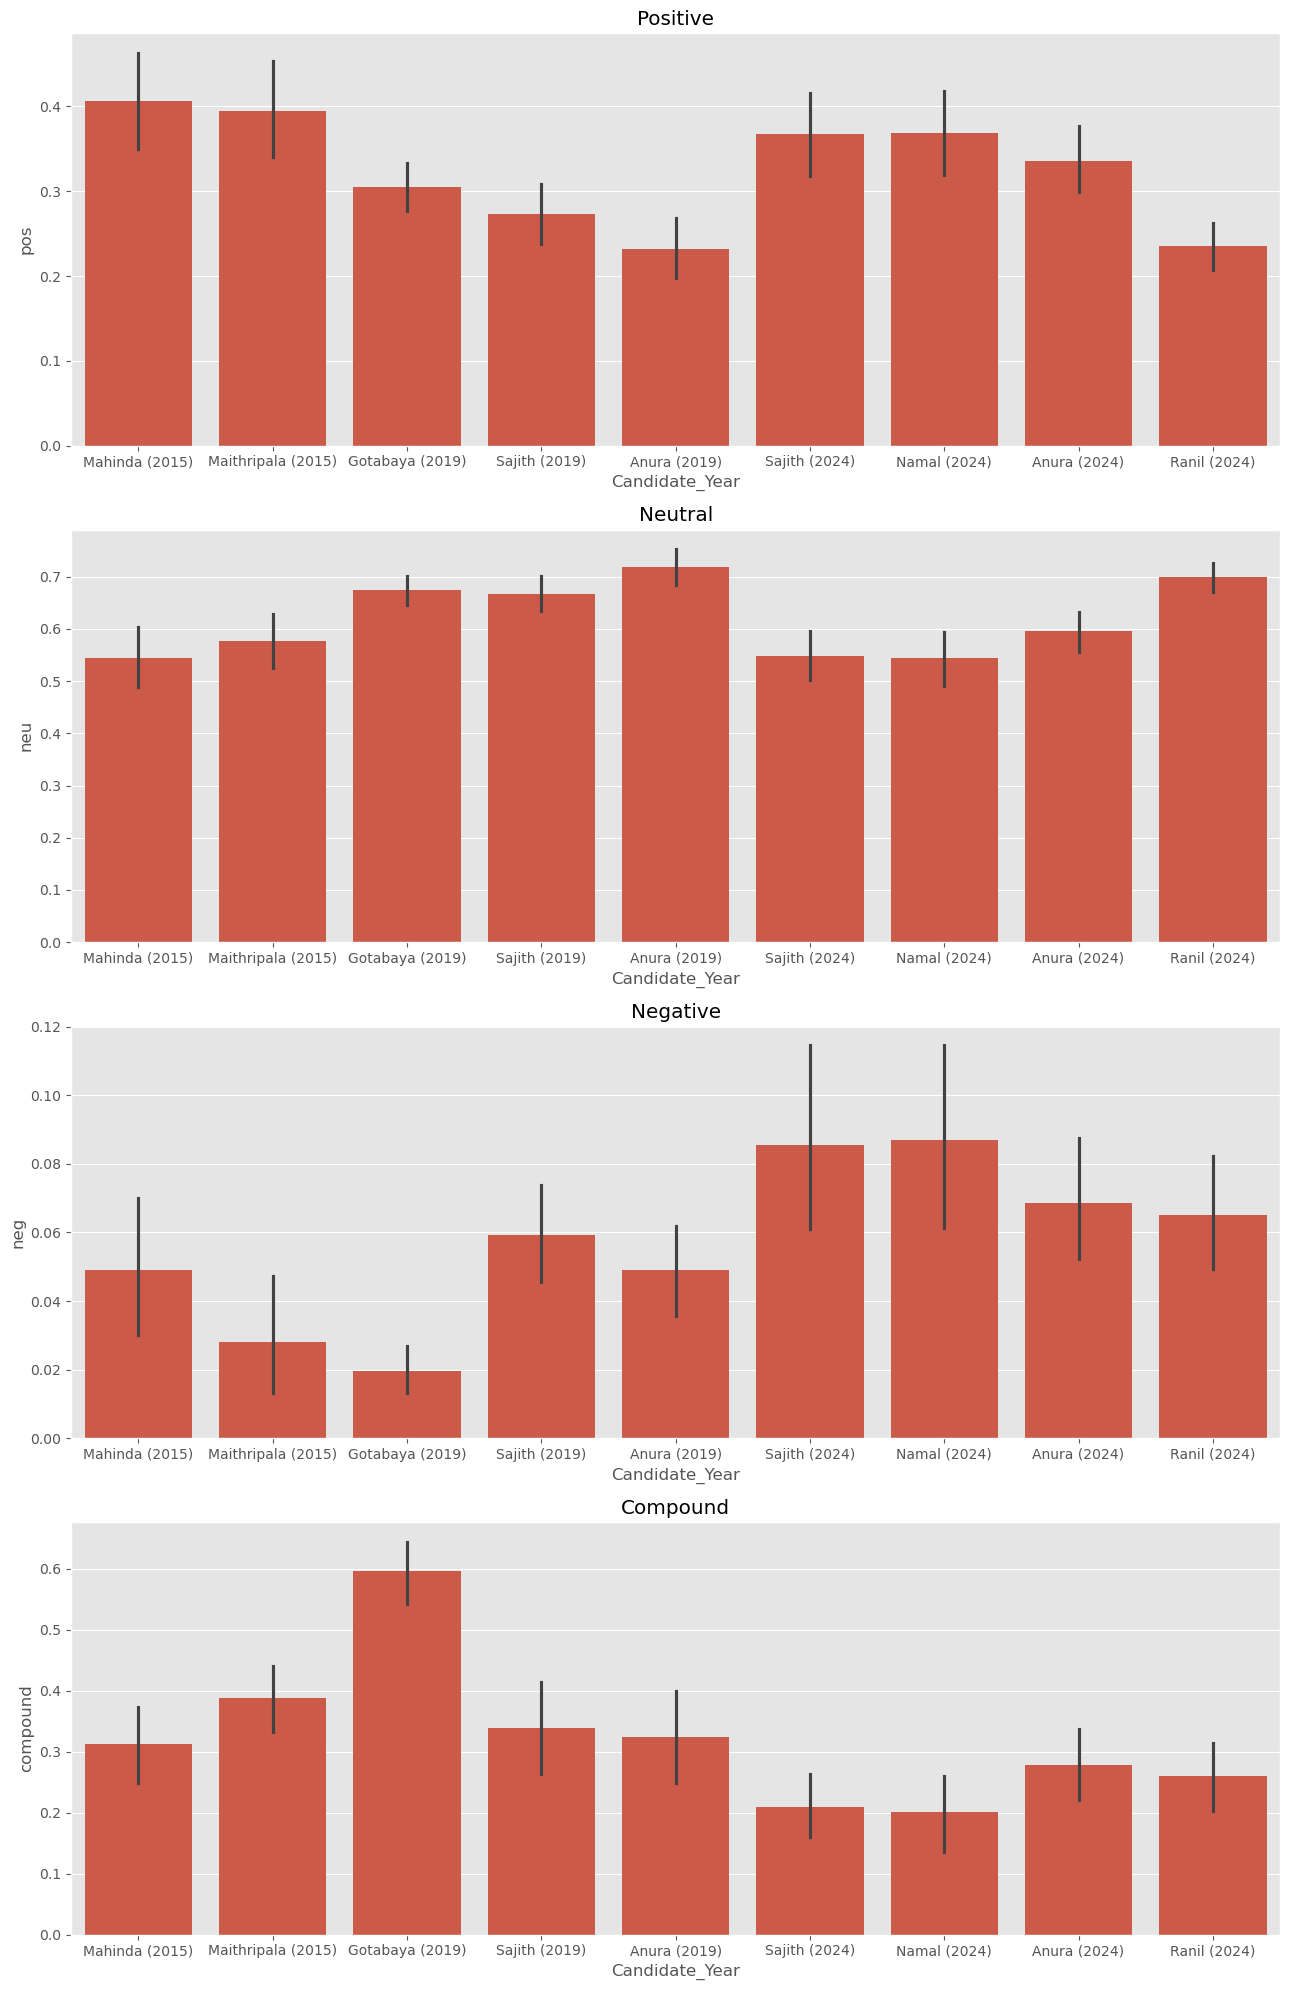

In [19]:
fig, axs = plt.subplots(4, 1, figsize=(13, 20))
sns.barplot(data=vaders, x='Candidate_Year', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Candidate_Year', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Candidate_Year', y='neg', ax=axs[2])
sns.barplot(data=vaders, x='Candidate_Year', y='compound', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

## 3. Roberta Pretrained Model

In [20]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

text = "Good night 😊"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)

# text = "Good night 😊"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")


C:\Users\Sandaru Fernando\AppData\Roaming\Python\Python312\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1) positive 0.8466
2) neutral 0.1458
3) negative 0.0076


In [21]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Excellent. We are always with you. We are requesting you to bring back this country where we can stand in front of the world with respect. All the best.


{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.9001}

In [22]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.003811493, 'roberta_neu': 0.081084184, 'roberta_pos': 0.9151044}


In [23]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [24]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        comment = row['Comment']
        id = row['Id']
        vader_result = sia.polarity_scores(comment)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(comment)
        both = {**vader_result_rename, **roberta_result}
        res[id] = both
    except RuntimeError:
        print(f'Broke for id {id}')

  0%|          | 0/1832 [00:00<?, ?it/s]

In [25]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [26]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'date', 'Candidate_name',
       'Comment', 'Election_year', 'Postal_data', 'Poll_data',
       'Final_percentage', 'Candidate_Year'],
      dtype='object')

### Compare Scores between models

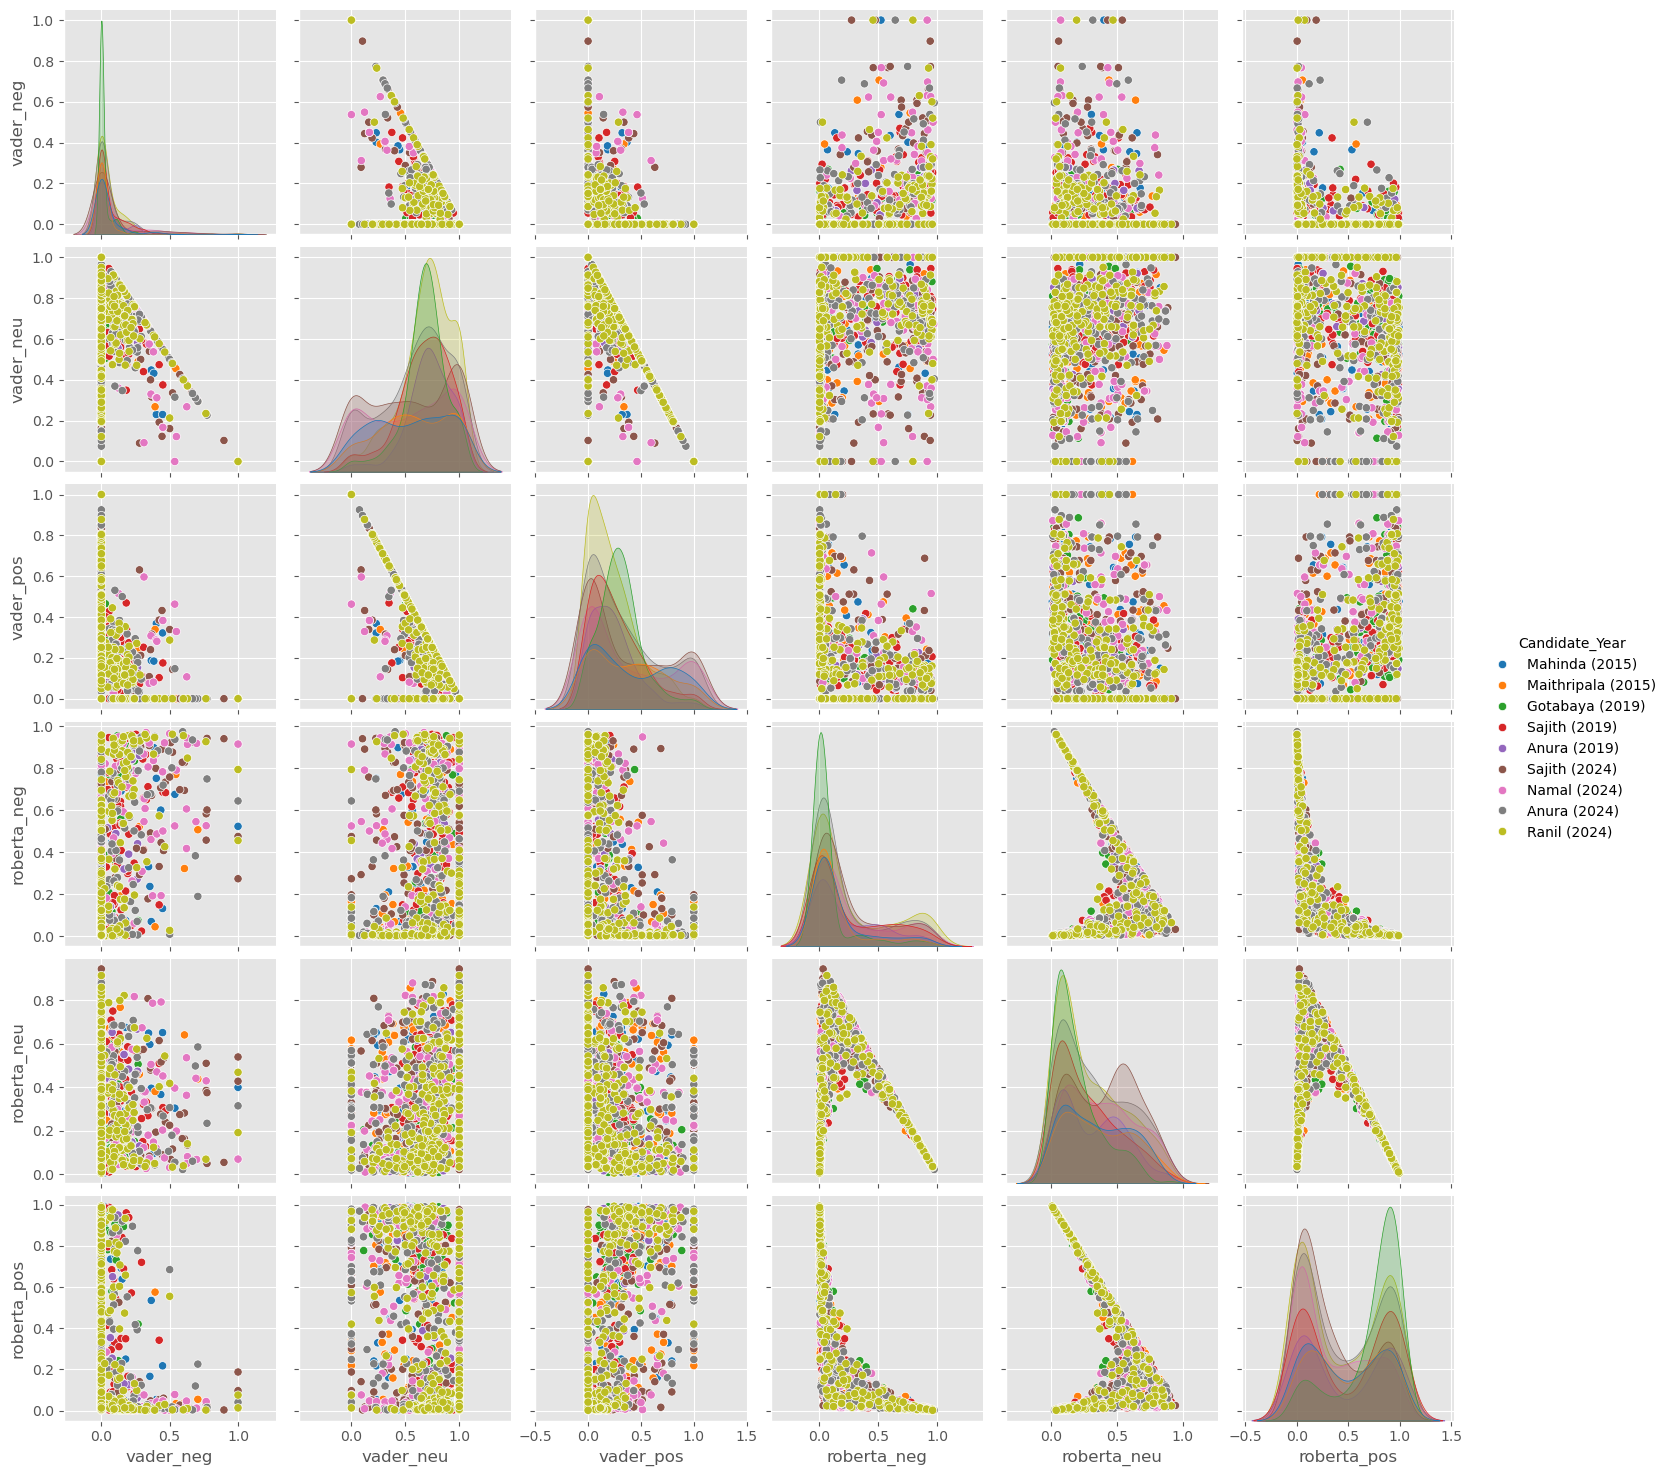

In [27]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Candidate_Year',
            palette='tab10')
plt.show()

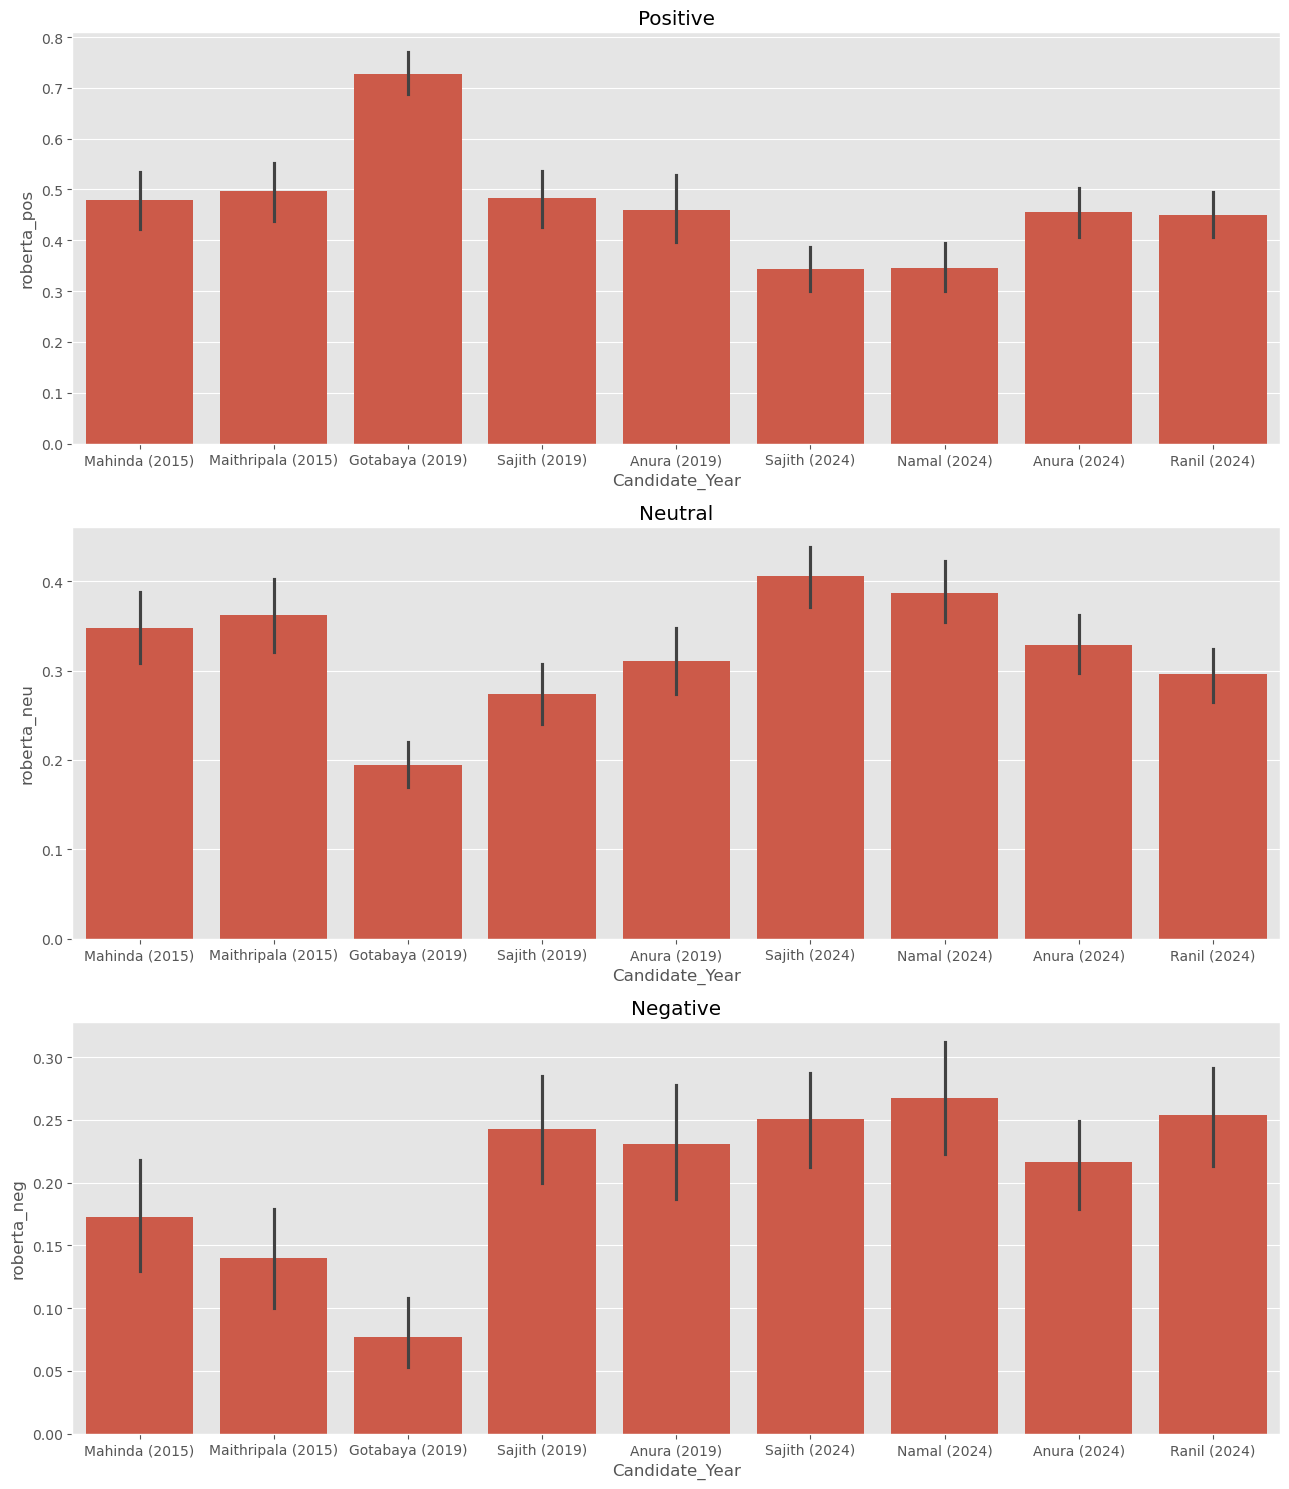

In [28]:
fig, axs = plt.subplots(3, 1, figsize=(13, 15))
sns.barplot(data=results_df, x='Candidate_Year', y='roberta_pos', ax=axs[0])
sns.barplot(data=results_df, x='Candidate_Year', y='roberta_neu', ax=axs[1])
sns.barplot(data=results_df, x='Candidate_Year', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [29]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,date,Candidate_name,Comment,Election_year,Postal_data,Poll_data,Final_percentage,Candidate_Year
0,1,0.0,0.524,0.476,0.8770,0.001283,0.006808,0.991908,12/31/2014,Mahinda,Happy new year to you my king !!! All the best...,2015,45.04,45.46,47.58,Mahinda (2015)
1,2,0.0,1.000,0.000,0.0000,0.085236,0.802499,0.112265,12/31/2014,Mahinda,go sri lanka go...,2015,45.04,45.46,47.58,Mahinda (2015)
2,3,0.0,0.000,1.000,0.7096,0.004070,0.112456,0.883474,12/31/2014,Mahinda,Good luck .,2015,45.04,45.46,47.58,Mahinda (2015)
3,4,0.0,0.000,1.000,0.5859,0.115487,0.511504,0.373009,12/31/2014,Mahinda,win,2015,45.04,45.46,47.58,Mahinda (2015)
4,5,0.0,0.145,0.855,0.7096,0.004989,0.096267,0.898744,12/31/2014,Mahinda,"Good luck, president",2015,45.04,45.46,47.58,Mahinda (2015)


In [30]:
results_df['Sentiment_score'] = results_df['roberta_pos'] - results_df['roberta_neg']
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,date,Candidate_name,Comment,Election_year,Postal_data,Poll_data,Final_percentage,Candidate_Year,Sentiment_score
0,1,0.0,0.524,0.476,0.8770,0.001283,0.006808,0.991908,12/31/2014,Mahinda,Happy new year to you my king !!! All the best...,2015,45.04,45.46,47.58,Mahinda (2015),0.990625
1,2,0.0,1.000,0.000,0.0000,0.085236,0.802499,0.112265,12/31/2014,Mahinda,go sri lanka go...,2015,45.04,45.46,47.58,Mahinda (2015),0.027029
2,3,0.0,0.000,1.000,0.7096,0.004070,0.112456,0.883474,12/31/2014,Mahinda,Good luck .,2015,45.04,45.46,47.58,Mahinda (2015),0.879404
3,4,0.0,0.000,1.000,0.5859,0.115487,0.511504,0.373009,12/31/2014,Mahinda,win,2015,45.04,45.46,47.58,Mahinda (2015),0.257521
4,5,0.0,0.145,0.855,0.7096,0.004989,0.096267,0.898744,12/31/2014,Mahinda,"Good luck, president",2015,45.04,45.46,47.58,Mahinda (2015),0.893755


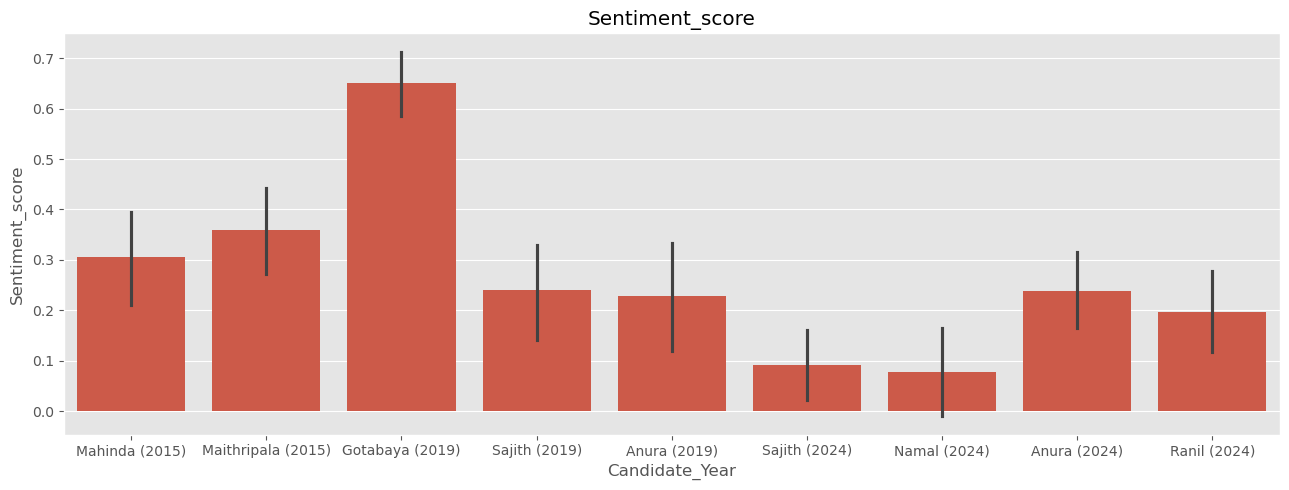

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(13, 5))
sns.barplot(data=results_df, x='Candidate_Year', y='Sentiment_score', ax=axs)
axs.set_title('Sentiment_score')
plt.tight_layout()
plt.show()

In [32]:
# Save edited CSV file as a new CSV file
csv_file_path = "final_dataset_edited.csv"
results_df.to_csv(csv_file_path, index=False)

In [33]:
# Save the first 738 rows of the DataFrame as a new CSV file
csv_file_path = "past_election_dataset.csv"
results_df.head(835).to_csv(csv_file_path, index=False)


In [34]:
results_df.head(835).tail()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,date,Candidate_name,Comment,Election_year,Postal_data,Poll_data,Final_percentage,Candidate_Year,Sentiment_score
830,831,0.000,0.739,0.261,0.6486,0.335168,0.473590,0.191242,11/4/2019,Anura,This country must be saved from these corrupt ...,2019,4.6,4.31,3.16,Anura (2019),-0.143925
831,832,0.000,0.862,0.138,0.5423,0.534187,0.448435,0.017379,11/4/2019,Anura,Why is the JVP not saying a word against the M...,2019,4.6,4.31,3.16,Anura (2019),-0.516808
832,833,0.000,1.000,0.000,0.0000,0.007439,0.238583,0.753978,11/4/2019,Anura,"Victory to the national people's force, includ...",2019,4.6,4.31,3.16,Anura (2019),0.746538
833,834,0.265,0.582,0.153,-0.2732,0.440393,0.472948,0.086659,11/3/2019,Anura,The ONLY hope for a nation in turmoil and coun...,2019,4.6,4.31,3.16,Anura (2019),-0.353734
834,835,0.082,0.687,0.232,0.6960,0.071773,0.277847,0.650379,11/3/2019,Anura,"Mr. Anura, today my duty has been fulfilled. T...",2019,4.6,4.31,3.16,Anura (2019),0.578606


In [35]:
# Save the rows from 738th row of the DataFrame as a new CSV file
csv_file_path = "present_election_dataset.csv"
results_df.iloc[835:].to_csv(csv_file_path, index=False)



In [36]:
results_df.iloc[835:].head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,date,Candidate_name,Comment,Election_year,Postal_data,Poll_data,Final_percentage,Candidate_Year,Sentiment_score
835,836,0.000,0.687,0.313,0.6249,0.005144,0.492034,0.502823,8/31/2024,Sajith,Sajith Premadasa: For a future where Sri Lanka...,2024,31.57,32.0,NaN,Sajith (2024),0.497679
836,837,0.000,0.000,1.000,0.7096,0.004211,0.099162,0.896627,8/31/2024,Sajith,Good luck,2024,31.57,32.0,NaN,Sajith (2024),0.892416
837,838,0.423,0.192,0.385,-0.0516,0.331776,0.614095,0.054129,8/31/2024,Sajith,No chance raja,2024,31.57,32.0,NaN,Sajith (2024),-0.277647
838,839,0.360,0.400,0.240,-0.2263,0.473580,0.478779,0.047641,8/31/2024,Sajith,"Sir,please solve teachers salary problems.",2024,31.57,32.0,NaN,Sajith (2024),-0.425939
839,840,0.000,0.316,0.684,0.7579,0.004566,0.087601,0.907834,8/31/2024,Sajith,definitely you will win sir,2024,31.57,32.0,NaN,Sajith (2024),0.903268
